# Project
# Forecasting

### Open price: The open price is the price at which a particular stock or security begins trading at the opening of the stock market on a particular day. It is the first price at which buyers and sellers agree to trade shares of the stock.

### Close price: The close price is the price at which a particular stock or security ends trading at the closing of the stock market on a particular day. It is the final price at which buyers and sellers agree to trade shares of the stock.

### Adjusted close price: The adjusted close price takes into account any corporate actions that may have affected the stock's price, such as dividends or stock splits. It is calculated by adjusting the closing price to reflect these actions, allowing for more accurate analysis of the stock's performance over time.

### Volume: Volume refers to the total number of shares of a particular stock or security that have been traded during a given period, typically a day. It is an important indicator of a stock's liquidity and the level of investor interest in buying or selling the stock.





In [1]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings 
warnings.filterwarnings('ignore')
from datetime import datetime
from plotly import graph_objs as go
from statsmodels.graphics.tsaplots import quarter_plot,month_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
from plotly import graph_objs as go

In [2]:
df1=pd.read_csv('AAPL.csv')
df1

Date        Open        High         Low       Close   Adj Close  \
0     2012-01-03   58.485714   58.928570   58.428570   58.747143   50.765709   
1     2012-01-04   58.571430   59.240002   58.468571   59.062859   51.038536   
2     2012-01-05   59.278572   59.792858   58.952858   59.718571   51.605175   
3     2012-01-06   59.967144   60.392857   59.888573   60.342857   52.144630   
4     2012-01-09   60.785713   61.107143   60.192856   60.247143   52.061932   
...          ...         ...         ...         ...         ...         ...   
2006  2019-12-23  280.529999  284.250000  280.369995  284.000000  282.054138   
2007  2019-12-24  284.690002  284.890015  282.920013  284.269989  282.322266   
2008  2019-12-26  284.820007  289.980011  284.700012  289.910004  287.923645   
2009  2019-12-27  291.119995  293.970001  288.119995  289.799988  287.814392   
2010  2019-12-30  289.459991  292.690002  285.220001  291.519989  289.522614   

        Volume  
0     75555200  
1     65005500  
2     67817400  
3     79573200  
4     98506100  
...        ...  
2006  24643000  
2007  12119700  
2008  23280300  
2009  36566500  
2010  36028600  

[2011 rows x 7 columns]

In [3]:
df1.Date=pd.to_datetime(df1.Date)
df1

Date        Open        High         Low       Close   Adj Close  \
0    2012-01-03   58.485714   58.928570   58.428570   58.747143   50.765709   
1    2012-01-04   58.571430   59.240002   58.468571   59.062859   51.038536   
2    2012-01-05   59.278572   59.792858   58.952858   59.718571   51.605175   
3    2012-01-06   59.967144   60.392857   59.888573   60.342857   52.144630   
4    2012-01-09   60.785713   61.107143   60.192856   60.247143   52.061932   
...         ...         ...         ...         ...         ...         ...   
2006 2019-12-23  280.529999  284.250000  280.369995  284.000000  282.054138   
2007 2019-12-24  284.690002  284.890015  282.920013  284.269989  282.322266   
2008 2019-12-26  284.820007  289.980011  284.700012  289.910004  287.923645   
2009 2019-12-27  291.119995  293.970001  288.119995  289.799988  287.814392   
2010 2019-12-30  289.459991  292.690002  285.220001  291.519989  289.522614   

        Volume  
0     75555200  
1     65005500  
2     67817400  
3     79573200  
4     98506100  
...        ...  
2006  24643000  
2007  12119700  
2008  23280300  
2009  36566500  
2010  36028600  

[2011 rows x 7 columns]

In [4]:
df1.set_index('Date',inplace=True)


In [5]:
df1.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=2011, freq=None)

In [6]:
df1.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100

### EDA

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


#### There are no missing values in the dataset by this

In [8]:
df1.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

##### There are no null values in the dataset

 ### check for holidays

In [9]:
from datetime import date
d0 = date(2012,1,3)
d1 = date(2019,12,30)
days = len(pd.date_range((d0),(d1)))
print(f'The number of days from {d0} to {d1} is {days} days')
print()
bdays = len(pd.bdate_range((d0),(d1)))
print(f'The number of business days from {d0} to {d1} is {bdays} days')
print()
print(f'The number of days from {d0} to {d1} in the given time series is {len(df1)} days')

The number of days from 2012-01-03 to 2019-12-30 is 2919 days

The number of business days from 2012-01-03 to 2019-12-30 is 2085 days

The number of days from 2012-01-03 to 2019-12-30 in the given time series is 2011 days


### Here we can see that time series contains holidays other than weekends

### we will create custom bussiness days

In [10]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay


In [11]:
us_cal = CustomBusinessDay(calendar=USFederalHolidayCalendar())


In [12]:
my_range = pd.date_range(start='2012-01-03',end='2019-12-30',freq=us_cal)
print(my_range.difference(df1.index))

DatetimeIndex(['2012-04-06', '2012-10-29', '2012-10-30', '2013-03-29',
               '2014-04-18', '2015-04-03', '2016-03-25', '2017-04-14',
               '2018-03-30', '2018-12-05', '2019-04-19'],
              dtype='datetime64[ns]', freq=None)


In [13]:
Cu = CustomBusinessDay(calendar=USFederalHolidayCalendar(),holidays=['2012-04-06', '2012-10-29', '2012-10-30', 
                                                                    '2013-03-29','2014-04-18', '2015-04-03', 
                                                                    '2016-03-25', '2017-04-14', '2018-03-30', 
                                                                    '2018-12-05', '2019-04-19'])
my_range = pd.date_range(start='2012-01-03',end='2019-12-30',freq=Cu)
print(my_range.difference(df1.index))

DatetimeIndex([], dtype='datetime64[ns]', freq=None)


#### C is the custom frequency here that includes the holidays other than weekends.

In [14]:
df1

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   58.485714   58.928570   58.428570   58.747143   50.765709   
2012-01-04   58.571430   59.240002   58.468571   59.062859   51.038536   
2012-01-05   59.278572   59.792858   58.952858   59.718571   51.605175   
2012-01-06   59.967144   60.392857   59.888573   60.342857   52.144630   
2012-01-09   60.785713   61.107143   60.192856   60.247143   52.061932   
...                ...         ...         ...         ...         ...   
2019-12-23  280.529999  284.250000  280.369995  284.000000  282.054138   
2019-12-24  284.690002  284.890015  282.920013  284.269989  282.322266   
2019-12-26  284.820007  289.980011  284.700012  289.910004  287.923645   
2019-12-27  291.119995  293.970001  288.119995  289.799988  287.814392   
2019-12-30  289.459991  292.690002  285.220001  291.519989  289.522614   

              Volume  
Date                  
2012-01-03  75555200  
2012-01-04  65005500  
2012-01-05  67817400  
2012-01-06  79573200  
2012-01-09  98506100  
...              ...  
2019-12-23  24643000  
2019-12-24  12119700  
2019-12-26  23280300  
2019-12-27  36566500  
2019-12-30  36028600  

[2011 rows x 6 columns]

In [15]:
df1=df1.asfreq(Cu)

In [16]:
df1.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=1995, freq='C')

In [17]:
df1[df1.duplicated()]

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []

#### There are no duplicate values 

In [18]:
df1.describe()

Open         High          Low        Close    Adj Close  \
count  1995.000000  1995.000000  1995.000000  1995.000000  1995.000000   
mean    126.609666   127.728963   125.482632   126.643948   119.406227   
std      50.399272    50.837589    50.038176    50.489882    52.346400   
min      55.424286    57.085712    55.014286    55.790001    48.921928   
25%      85.789288    86.685711    84.976429    86.107143    75.025200   
50%     113.050003   114.190002   111.870003   113.050003   105.222908   
75%     164.940002   167.314995   163.349998   165.090003   159.946327   
max     291.119995   293.970001   288.119995   291.519989   289.522614   

             Volume  
count  1.995000e+03  
mean   5.957054e+07  
std    4.689284e+07  
min    1.136200e+07  
25%    2.759375e+07  
50%    4.346960e+07  
75%    7.482090e+07  
max    3.765300e+08

From the above information,we can say that,

the average opening price of apple stock is 126.707 and closing price is 126.741

the average highest stock price is 127.827 and lowest price is 125.580

whereas the minimum value of opening and closing price is 55.424 and 55.790 respectively.

minimum value of 'Highest' and 'lowest' stock price is 57.0857 and 55.014 respectively.

from the above information we can analyse that as there is large difference between 3rd quartile value of every coloumn and

maximum value of every coloumn , i can say that we may have outliers in our data.



In [19]:
df1.corr()

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999781  0.999718  0.999495   0.998892 -0.558429
High       0.999781  1.000000  0.999655  0.999747   0.999167 -0.555355
Low        0.999718  0.999655  1.000000  0.999767   0.999175 -0.563900
Close      0.999495  0.999747  0.999767  1.000000   0.999399 -0.560097
Adj Close  0.998892  0.999167  0.999175  0.999399   1.000000 -0.566760
Volume    -0.558429 -0.555355 -0.563900 -0.560097  -0.566760  1.000000

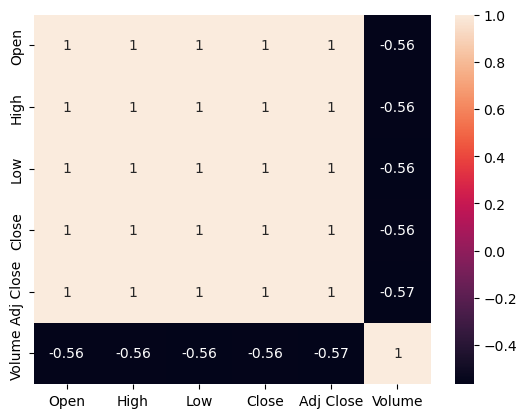

In [20]:
sn.heatmap(df1.corr(), annot=True)
plt.show()

#### All the indipendent variables are storngly correlated to each that 

#### Whereas in  correlation every Variable is strongly correlated almost 0.99 that is completely correlated.So we can choose any one of the variable to predict or forecast (that can not be only closing price).As only single digit difference between every variable. whereas volume is negatively correlated

In [21]:
df1=df1.drop(['Volume','Adj Close'], axis=1)

In [22]:
df1

Open        High         Low       Close
Date                                                      
2012-01-03   58.485714   58.928570   58.428570   58.747143
2012-01-04   58.571430   59.240002   58.468571   59.062859
2012-01-05   59.278572   59.792858   58.952858   59.718571
2012-01-06   59.967144   60.392857   59.888573   60.342857
2012-01-09   60.785713   61.107143   60.192856   60.247143
...                ...         ...         ...         ...
2019-12-23  280.529999  284.250000  280.369995  284.000000
2019-12-24  284.690002  284.890015  282.920013  284.269989
2019-12-26  284.820007  289.980011  284.700012  289.910004
2019-12-27  291.119995  293.970001  288.119995  289.799988
2019-12-30  289.459991  292.690002  285.220001  291.519989

[1995 rows x 4 columns]

### line plot

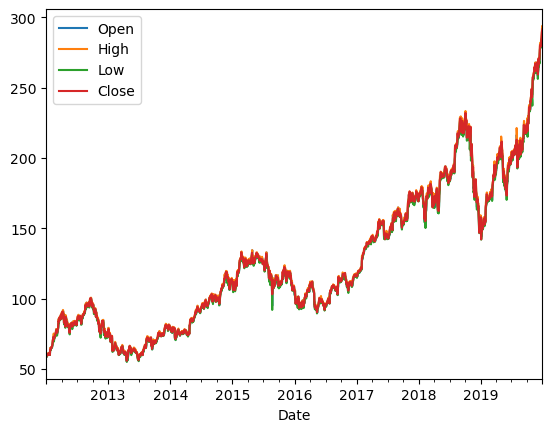

In [23]:

df1.plot()
plt.show()

### there is upward exponential trend 

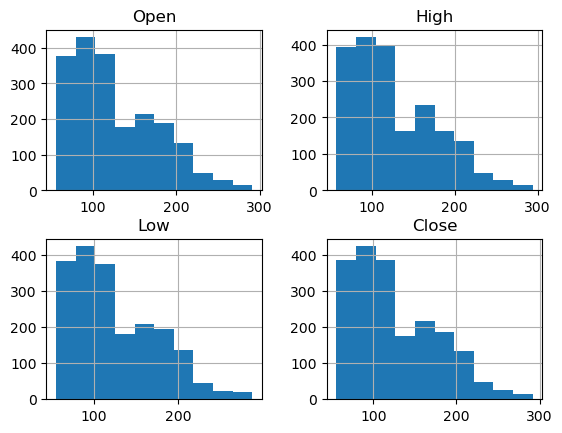

In [24]:
df1.hist()
plt.show()

#### it shows that data is right skewed , the data is non stationary

#### considering only closing price for analysis

In [25]:
df3=df1.drop(['Open','High','Low'], axis=1)
df3

Close
Date                  
2012-01-03   58.747143
2012-01-04   59.062859
2012-01-05   59.718571
2012-01-06   60.342857
2012-01-09   60.247143
...                ...
2019-12-23  284.000000
2019-12-24  284.269989
2019-12-26  289.910004
2019-12-27  289.799988
2019-12-30  291.519989

[1995 rows x 1 columns]

### Downsampling data to monthly

In [26]:
resample=df3.resample('M')
df_d=resample.mean()
df_d

Close
Date                  
2012-01-31   61.225428
2012-02-29   71.081572
2012-03-31   82.501104
2012-04-30   86.571857
2012-05-31   80.667597
...                ...
2019-08-31  204.957728
2019-09-30  217.994999
2019-10-31  235.260000
2019-11-30  262.537371
2019-12-31  275.669496

[96 rows x 1 columns]

In [27]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_d.index,y=df_d.Close,name='stock_close'))
fig.layout.update(title_text='Line graph of Close price using Plotly with a slider',xaxis_rangeslider_visible=True)
fig.show()

### Monthly mean forcasting

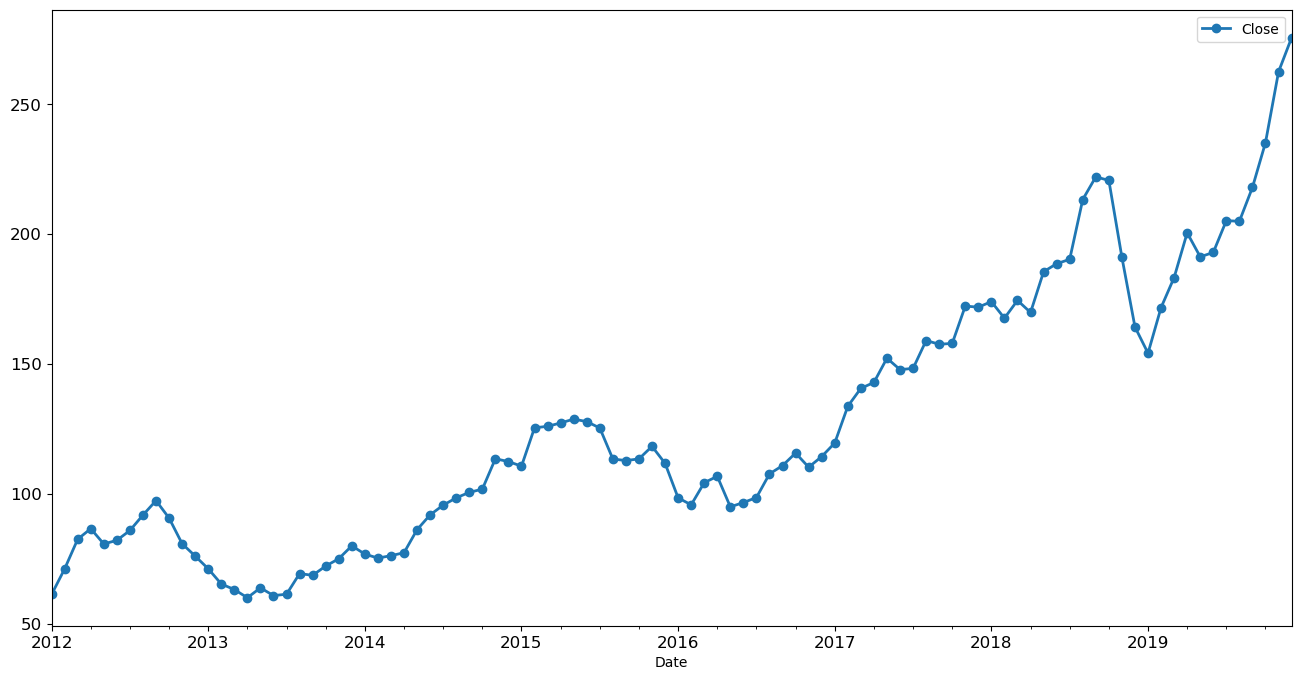

In [28]:
df_d.plot(figsize=(16,8), linewidth=2,marker='o', fontsize=12);

## Visual Inspection :
#### From the above line plot, the mean is not constant and the variance is also not constant. So the series is not stationary.

In [29]:
stl = STL(df_d)
result = stl.fit()

In [30]:
seasonal, trend, resid = result.seasonal, result.trend, result.resid

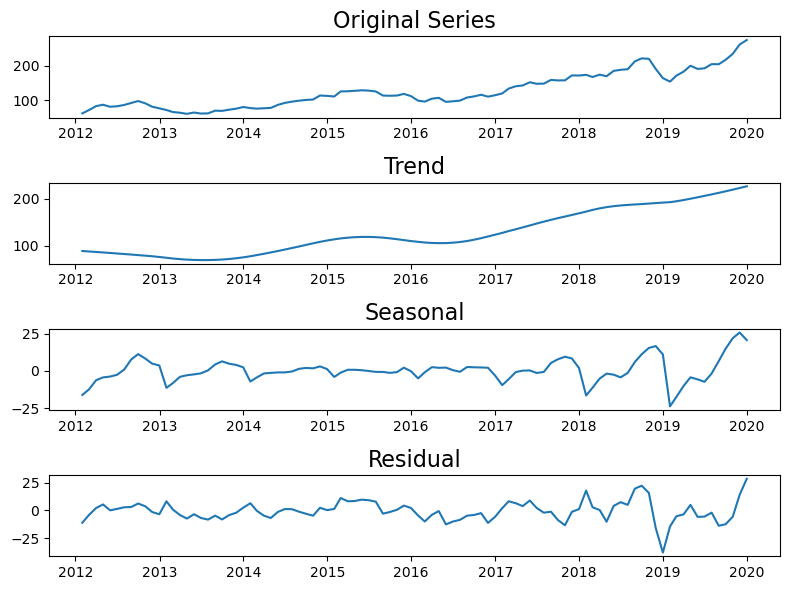

In [31]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(df_d)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

### from the above plota  we can see there is increasing trend
### There is no constant seasonality 

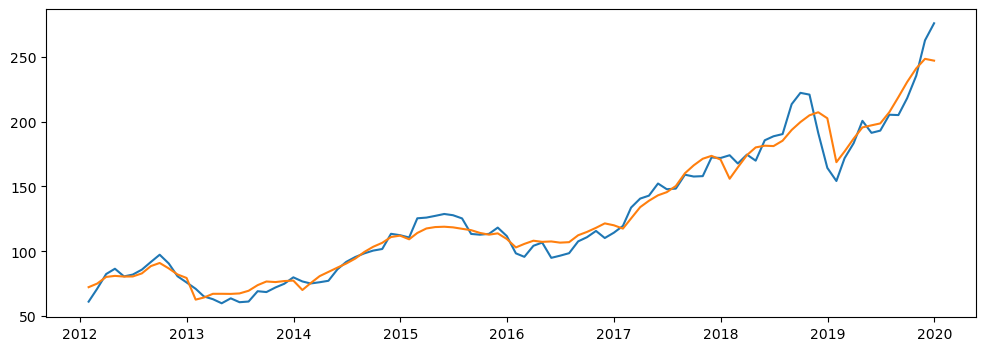

In [32]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(df_d)
plt.plot(estimated);


## Seasonal-Trend decomposing 

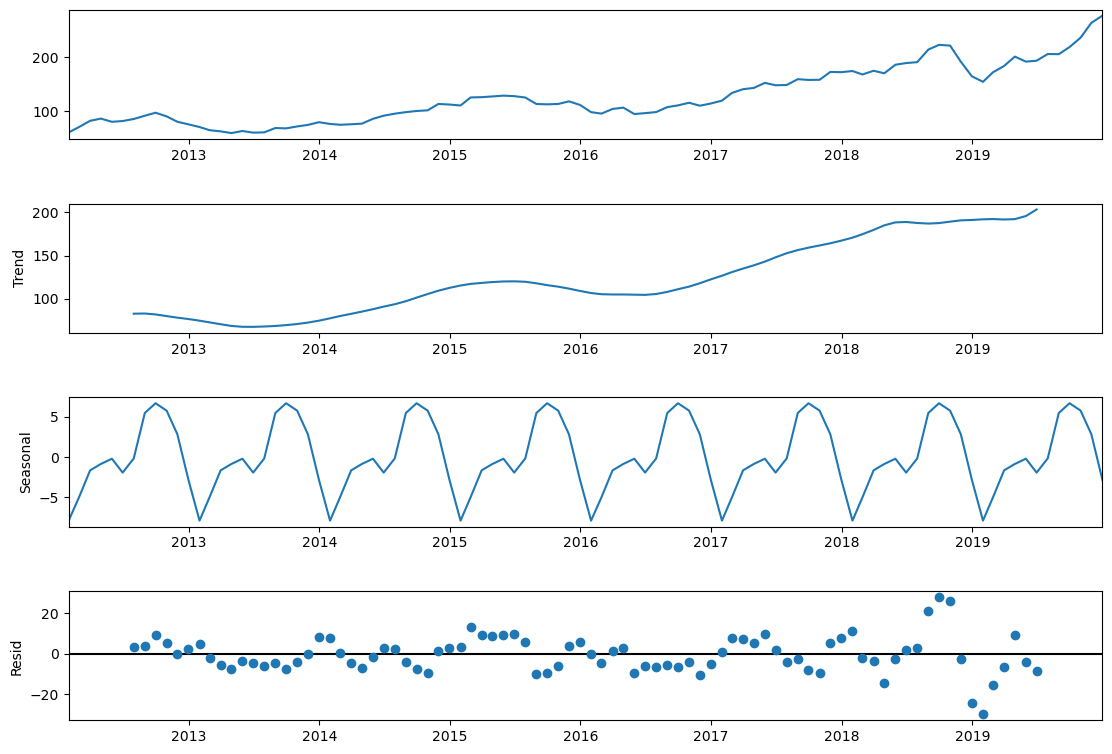

In [33]:
seas_add = seasonal_decompose(df_d, model='additive')
seas_add.plot()
plt.gcf().set_size_inches(12, 8);

### Repeating patterns are seen here. Seasonality refers to predictable changes that occur over a one-year period in a business or economy based on the seasons including calendar or commercial seasons.

### Seasonal sub-series plots

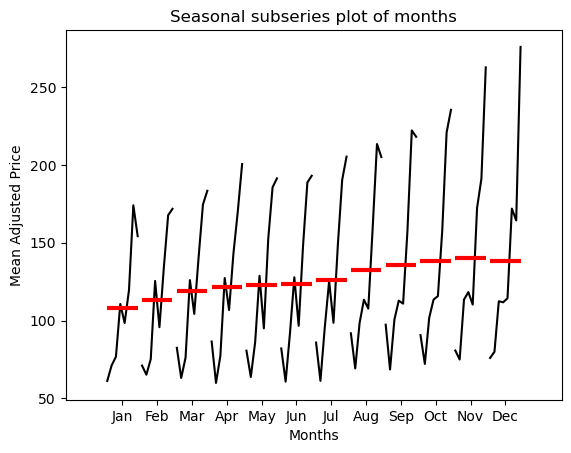

In [34]:
month_plot(df3['Close'].resample('M').mean())
plt.title('Seasonal subseries plot of months')
plt.xlabel('Months')
plt.ylabel('Mean Adjusted Price')
plt.show()


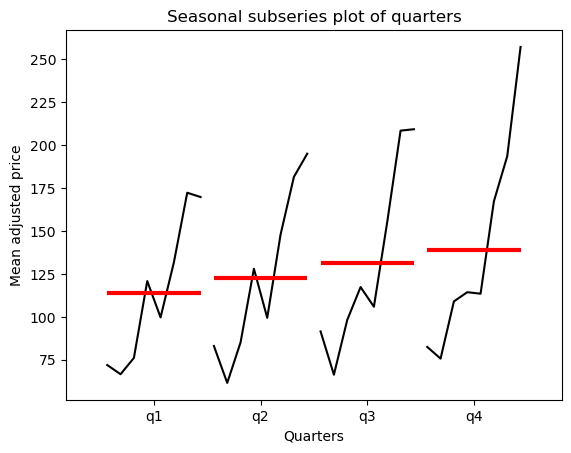

In [35]:
quarter_plot(df3['Close'].resample('Q').mean())
plt.title('Seasonal subseries plot of quarters')
plt.xlabel('Quarters')
plt.ylabel('Mean adjusted price')
plt.show()

### The quarter plot shows the seasonality more clearly than the month plot.

## check for stationarity

In [36]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df_d.Close, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  0.51196549845976
2. P-Value :  0.9852322761789652
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 94
5. Critical Values :
	 1% :  -3.5019123847798657
	 5% :  -2.892815255482889
	 10% :  -2.583453861475781


#### As we can see p-value is greater than 0.05 hence we reject null hypothesis ie data is stationary  
#### so we accept that our data is non stationary 

In [37]:
# First-order difference
df3['First-Order'] = df3['Close'].diff(periods=1)
df3

#Drop na 
df3.dropna(inplace=True)
df3

Close  First-Order
Date                               
2012-01-04   59.062859     0.315716
2012-01-05   59.718571     0.655712
2012-01-06   60.342857     0.624286
2012-01-09   60.247143    -0.095714
2012-01-10   60.462856     0.215713
...                ...          ...
2019-12-23  284.000000     4.559998
2019-12-24  284.269989     0.269989
2019-12-26  289.910004     5.640015
2019-12-27  289.799988    -0.110016
2019-12-30  291.519989     1.720001

[1994 rows x 2 columns]

In [38]:
dftest = adfuller(df3['First-Order'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val)

1. ADF :  -9.195580001678566
2. P-Value :  2.0670686766522078e-15
3. Num Of Lags :  16
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1977
5. Critical Values :
	 1% :  -3.433661993406868
	 5% :  -2.8630030510232647
	 10% :  -2.567548867394869


### Here the data has become stationary

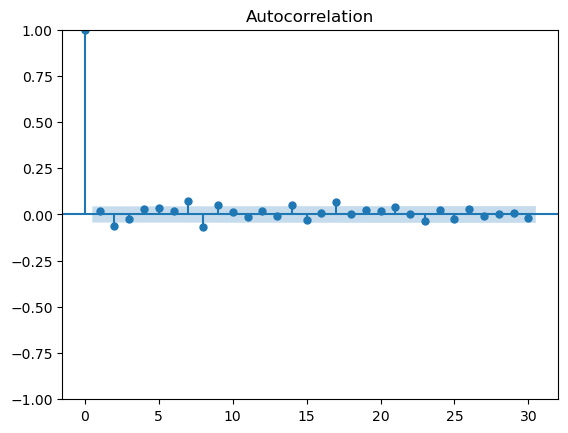

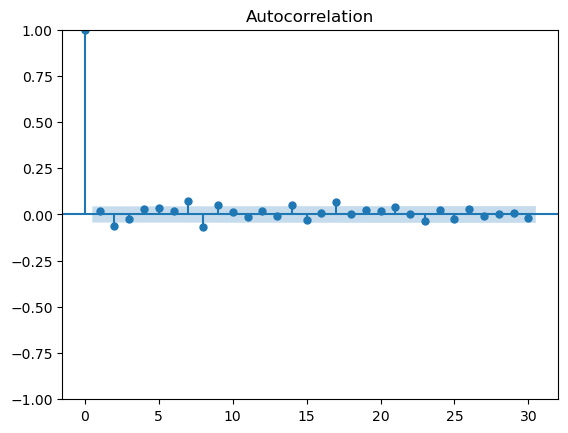

In [39]:
plot_acf(df3['First-Order'], lags=30)


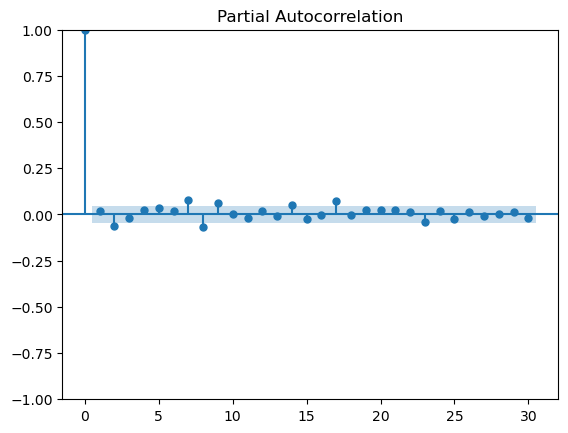

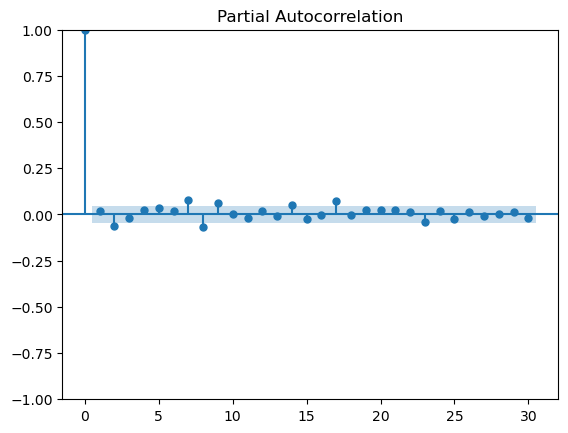

In [40]:
plot_pacf(df3['First-Order'], lags=30)

In both ACF and PACF plots, the spike at one is significant so it is first order MA model from ACF, q=1 and first order AR model from PACF,p=1 --> ARMA(1,1).

### Since the time series needed first order differencing to make it stationary, d=1. So ARIMA(1,1,1),where

p - non-seasonal AutoRegressive(AR) order

q - non-seasonal Moving Average(MA) order

d - non-seasonal differencing

For the seasonality, other than initial spikes there is a spike at 8 in PACF plot, so order for AR, P=1. And there are no significant spikes on ACF plot other than initial ones, so MA order, Q=0. Since the time series had seasonality and we did first order seasonal differencing D=1, where

P - seasonal AutoRegressive(AR) order

Q - seasonal Moving Average(MA) order

D - seasonal differencing

In [41]:
df3

Close  First-Order
Date                               
2012-01-04   59.062859     0.315716
2012-01-05   59.718571     0.655712
2012-01-06   60.342857     0.624286
2012-01-09   60.247143    -0.095714
2012-01-10   60.462856     0.215713
...                ...          ...
2019-12-23  284.000000     4.559998
2019-12-24  284.269989     0.269989
2019-12-26  289.910004     5.640015
2019-12-27  289.799988    -0.110016
2019-12-30  291.519989     1.720001

[1994 rows x 2 columns]

In [42]:
df3=df3.drop('First-Order', axis=1)
df3

Close
Date                  
2012-01-04   59.062859
2012-01-05   59.718571
2012-01-06   60.342857
2012-01-09   60.247143
2012-01-10   60.462856
...                ...
2019-12-23  284.000000
2019-12-24  284.269989
2019-12-26  289.910004
2019-12-27  289.799988
2019-12-30  291.519989

[1994 rows x 1 columns]

### spliting into train and test data

In [43]:
train = df3.iloc[:len(df3['Close'])-249]

# Taking last one year for testing
test = df3.iloc[len(df3['Close'])-249:]
test.head(),test.tail()

(                 Close
 Date                  
 2019-01-02  157.919998
 2019-01-03  142.190002
 2019-01-04  148.259995
 2019-01-07  147.929993
 2019-01-08  150.750000,
                  Close
 Date                  
 2019-12-23  284.000000
 2019-12-24  284.269989
 2019-12-26  289.910004
 2019-12-27  289.799988
 2019-12-30  291.519989)

## ARIMA model

In [44]:
model1=ARIMA(train, order=(1,1,1))
model1=model1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1745
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3620.020
Date:                Thu, 06 Apr 2023   AIC                           7246.041
Time:                        12:58:49   BIC                           7262.433
Sample:                    01-04-2012   HQIC                          7252.101
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7994      0.094     -8.488      0.000      -0.984      -0.615
ma.L1          0.8394      0.087      9.668      0.000       0.669       1.010
sigma2         3.7192      0.063     58.745      0.000       3.595       3.843
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3259.97
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               3.41   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
start=len(train)
end=len(train)+len(test)-1
pred1=model1.predict(start=start,end=end,type='levels')

In [46]:
plt.figure(figsize=(14,6))
plt.plot(pred1, label='Predicted')
plt.plot(test, label='Test')
plt.legend(loc='best')
plt.show()

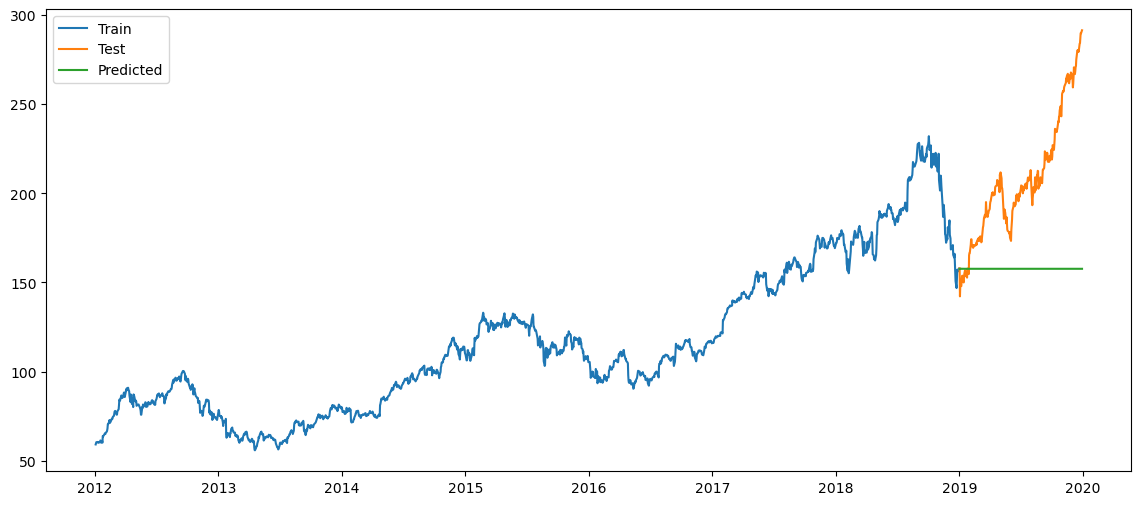

In [47]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred1, label='Predicted')
plt.legend(loc='best')
plt.show()

### Arima model do not capture seasonality


In [48]:
rmse = sqrt(mean_squared_error(pred1,test))

print('Root Mean Squared Error of ARIMA model =',rmse)

Root Mean Squared Error of ARIMA model = 60.42926269277306


In [49]:
test.mean()

Close    207.585462
dtype: float64

## SARIMA model

In [50]:
model=SARIMAX(train['Close'],order=(1, 1, 1),seasonal_order=(0,1,0,30))
results=model.fit()


In [51]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Close   No. Observations:                 1745
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 30)   Log Likelihood               -4145.999
Date:                             Thu, 06 Apr 2023   AIC                           8297.997
Time:                                     12:58:53   BIC                           8314.337
Sample:                                 01-04-2012   HQIC                          8304.044
                                      - 12-31-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9546      0.007   -134.724      0.000      -0.968      -0.941
ma.L1          0.9997      0.011     87.793      0.000       0.977       1.022
sigma2         7.3743      0.173     42.606      0.000       7.035       7.714
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               927.46
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               3.31   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
start=len(train)
end=len(train)+len(test)-1
pred2=results.predict(start=start,end=end,type='levels')

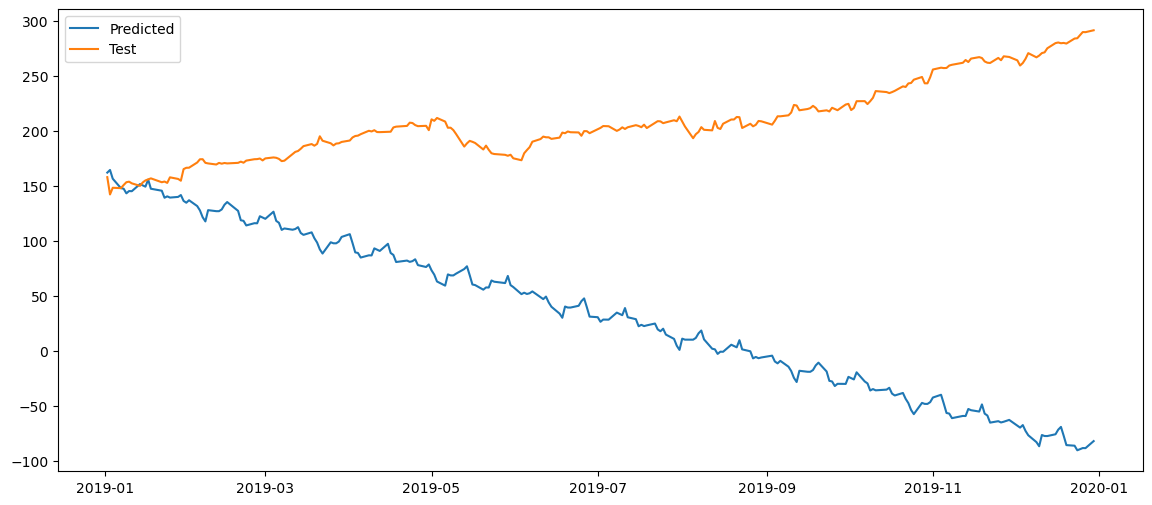

In [53]:
plt.figure(figsize=(14,6))
plt.plot(pred2, label='Predicted')
plt.plot(test, label='Test')
plt.legend(loc='best')
plt.show()

In [54]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred2, label='Predicted')
plt.legend(loc='best')
plt.show()

In [55]:
rmse2 = sqrt(mean_squared_error(pred2,test))

print('Root Mean Squared Error of ARIMA model =',rmse2)

Root Mean Squared Error of ARIMA model = 201.45281919968497


In [56]:
test.mean()

Close    207.585462
dtype: float64

### SARIMA with Quarterly Seasonality

In [57]:
model_sr = SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,0,66))
model_sr = model_sr.fit()
model_sr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Close   No. Observations:                 1745
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 66)   Log Likelihood               -3803.034
Date:                             Thu, 06 Apr 2023   AIC                           7614.068
Time:                                     12:59:24   BIC                           7635.770
Sample:                                 01-04-2012   HQIC                          7622.107
                                      - 12-31-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2088      0.231     -0.903      0.366      -0.662       0.244
ma.L1          0.2775      0.230      1.205      0.228      -0.174       0.729
ar.S.L66      -0.5283      0.018    -29.553      0.000      -0.563      -0.493
sigma2         5.3767      0.098     54.695      0.000       5.184       5.569
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1958.46
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.98   Skew:                            -0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
start=len(train)
end=len(train)+len(test)-1
pred3=model_sr.predict(start=start,end=end,type='levels')

In [59]:
plt.figure(figsize=(14,6))
plt.plot(pred3, label='Predicted')
plt.plot(test, label='Test')
plt.legend(loc='best')
plt.show()

In [60]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred3, label='Predicted')
plt.legend(loc='best')
plt.show()

In [61]:
rmse3 = sqrt(mean_squared_error(pred3,test))

print('Root Mean Squared Error of ARIMA model =',rmse3)

Root Mean Squared Error of ARIMA model = 105.75542667695646


## ARIMA model with annual seasonal order

In [62]:
model_se = sm.tsa.arima.ARIMA(train,order=(1,1,1),seasonal_order=(1,1,0,251))
result = model_se.fit(method='innovations_mle',low_memory=True,cov_type='none')


In [63]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 1745
Model:             ARIMA(1, 1, 1)x(1, 1, [], 251)   Log Likelihood               -3382.661
Date:                            Thu, 06 Apr 2023   AIC                           6773.323
Time:                                    13:00:15   BIC                           6794.557
Sample:                                01-04-2012   HQIC                          6781.235
                                     - 12-31-2018                                         
Covariance Type:                     Not computed                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8207        nan        nan        nan         nan         nan
ma.L1          0.8446        nan        nan        nan         nan         nan
ar.S.L251     -0.3962        nan        nan        nan         nan         nan
sigma2         5.2844        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):               900.09
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               2.98   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix not calculated.
"""

In [64]:
start=len(train)
end=len(train)+len(test)-1
pred4=result.predict(start=start,end=end,type='levels')

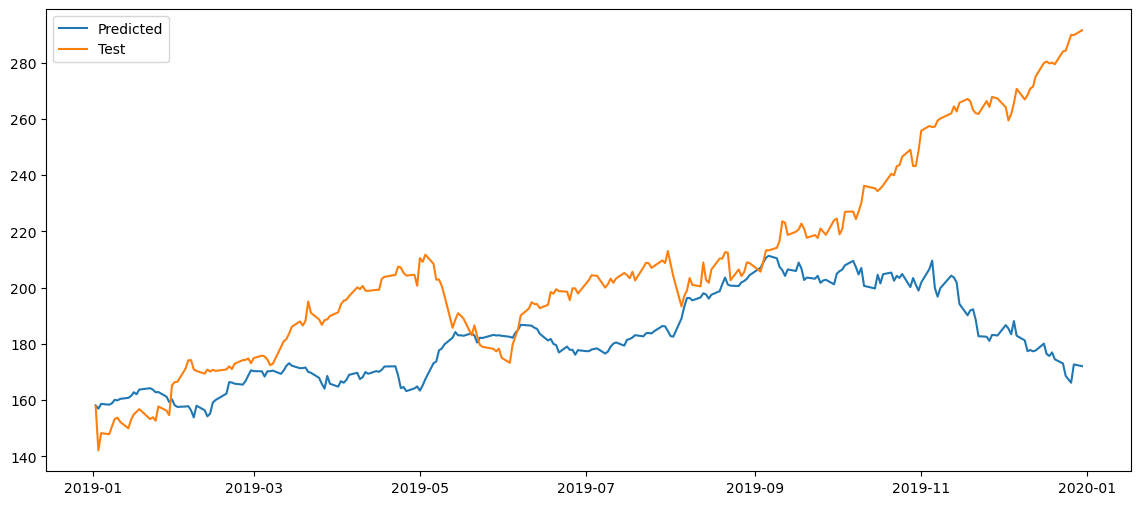

In [65]:
plt.figure(figsize=(14,6))
plt.plot(pred4, label='Predicted')
plt.plot(test, label='Test')
plt.legend(loc='best')
plt.show()

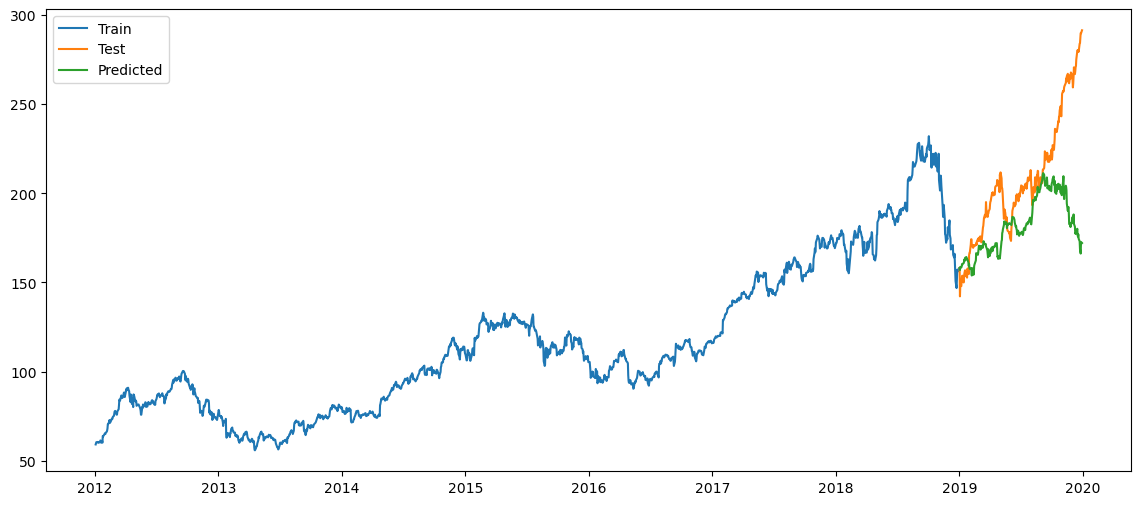

In [66]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred4, label='Predicted')
plt.legend(loc='best')
plt.show()

In [67]:
rmse4 = sqrt(mean_squared_error(pred4,test))

print('Root Mean Squared Error of ARIMA model =',rmse4)

Root Mean Squared Error of ARIMA model = 38.846977737355274


### Holts- winter Triple Exponential Smoothening

In [68]:
model_h = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=252)
model_h = model_h.fit()
model_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                    Close   No. Observations:                 1745
Model:             ExponentialSmoothing   SSE                           5476.493
Optimized:                         True   AIC                           2507.775
Trend:                   Multiplicative   BIC                           3906.689
Seasonal:                Multiplicative   AICC                          2597.710
Seasonal Periods:                   252   Date:                 Thu, 06 Apr 2023
Box-Cox:                          False   Time:                         13:00:21
Box-Cox Coeff.:                    None                                         
==================================================================================
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.9950036                alpha                 True
smoothing_trend                0.0001001                 beta                 True
smoothing_seasonal             0.0049925                gamma                 True
initial_level                  82.183430                  l.0                 True
initial_trend                  1.0001960                  b.0                 True
initial_seasons.0              0.9575879                  s.0                 True
initial_seasons.1              0.9698878                  s.1                 True
initial_seasons.2              0.9840065                  s.2                 True
initial_seasons.3              0.9837995                  s.3                 True
initial_seasons.4              0.9875265                  s.4                 True
initial_seasons.5              0.9849101                  s.5                 True
initial_seasons.6              0.9715249                  s.6                 True
initial_seasons.7              0.9735934                  s.7                 True
initial_seasons.8              0.9933047                  s.8                 True
initial_seasons.9              0.9930141                  s.9                 True
initial_seasons.10             0.9700977                 s.10                 True
initial_seasons.11             0.9733955                 s.11                 True
initial_seasons.12             0.9844292                 s.12                 True
initial_seasons.13             0.9905332                 s.13                 True
initial_seasons.14             0.9988267                 s.14                 True
initial_seasons.15             1.0099255                 s.15                 True
initial_seasons.16             1.0117322                 s.16                 True
initial_seasons.17             1.0143701                 s.17                 True
initial_seasons.18             1.0235845                 s.18                 True
initial_seasons.19             1.0326527                 s.19                 True
initial_seasons.20             1.0406627                 s.20                 True
initial_seasons.21             1.0499161                 s.21                 True
initial_seasons.22             1.0522730                 s.22                 True
initial_seasons.23             1.0478262                 s.23                 True
initial_seasons.24             1.0458786                 s.24                 True
initial_seasons.25             1.0551132                 s.25                 True
initial_seasons.26             1.0575675                 s.26                 True
initial_seasons.27             1.0508207                 s.27                 True
initial_seasons.28             1.0556841                 s.28                 True
initial_seasons.29             1.0537412                 s.29          

In [69]:
pred5 = model_h.predict(start=start,end=end)

In [70]:
plt.figure(figsize=(14,6))
plt.plot(pred5, label='Predicted')
plt.plot(test, label='Test')
plt.legend(loc='best')
plt.show()

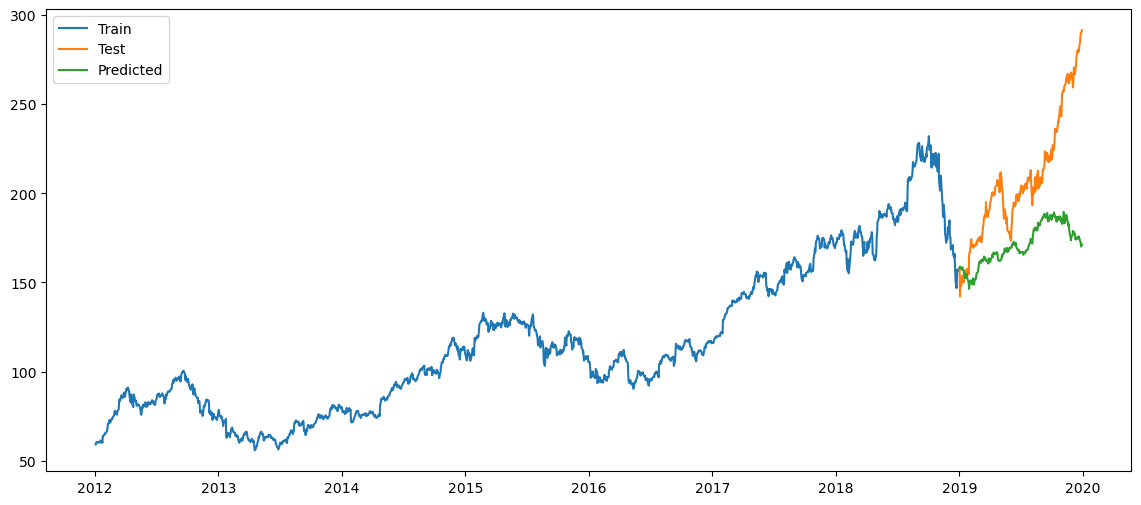

In [71]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred5, label='Predicted')
plt.legend(loc='best')
plt.show()

In [72]:
rmse5 = sqrt(mean_squared_error(pred5,test))

print('Root Mean Squared Error of ARIMA model =',rmse5)

Root Mean Squared Error of ARIMA model = 45.77426431894978


## Summarizing 

In [73]:
data1 = {'Models':['ARIMA','SARIMA','SARIMA with Quaterly Seasonality','ARIMA with seasonal order',
                   'Holt-Winters Triple Exponential Smoothing'
                   ],
       'Root Mean Squared Error':[rmse,rmse2,rmse3,rmse4,rmse5]}
Model = pd.DataFrame(data1)
Model = Model.sort_values('Root Mean Squared Error').reset_index(drop=True)
Model

Models  Root Mean Squared Error
0                  ARIMA with seasonal order                38.846978
1  Holt-Winters Triple Exponential Smoothing                45.774264
2                                      ARIMA                60.429263
3           SARIMA with Quaterly Seasonality               105.755427
4                                     SARIMA               201.452819

### As ARIMA with annual seasonality is giving the best accuracy less error we will choose this model for forcasting

In [74]:
model_se1 = sm.tsa.arima.ARIMA(df3['Close'],order=(1,1,1),seasonal_order=(1,1,0,251))
model_se1 = model_se1.fit(method='innovations_mle',low_memory=True,cov_type='none')
model_se1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 1994
Model:             ARIMA(1, 1, 1)x(1, 1, [], 251)   Log Likelihood               -4151.377
Date:                            Thu, 06 Apr 2023   AIC                           8310.754
Time:                                    13:01:04   BIC                           8332.605
Sample:                                01-04-2012   HQIC                          8318.833
                                     - 12-30-2019                                         
Covariance Type:                     Not computed                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8393        nan        nan        nan         nan         nan
ma.L1          0.8610        nan        nan        nan         nan         nan
ar.S.L251     -0.5440        nan        nan        nan         nan         nan
sigma2         6.5389        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1507.24
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.90   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.52
===================================================================================

Warnings:
[1] Covariance matrix not calculated.
"""

## Forecasting for next 30 days

In [75]:
f2=pd.DataFrame(model_se1.forecast(30))
f2

predicted_mean
2019-12-31      289.375677
2020-01-02      289.883524
2020-01-03      290.392063
2020-01-06      282.074457
2020-01-07      286.607065
2020-01-08      286.342521
2020-01-09      288.145626
2020-01-10      290.315786
2020-01-13      290.243391
2020-01-14      289.495483
2020-01-15      288.470267
2020-01-16      290.374516
2020-01-17      292.240550
2020-01-21      292.146343
2020-01-22      294.187414
2020-01-23      292.652486
2020-01-24      292.514197
2020-01-27      291.151680
2020-01-28      293.490661
2020-01-29      291.282371
2020-01-30      288.858822
2020-01-31      293.890090
2020-02-03      292.506362
2020-02-04      292.000069
2020-02-05      294.410552
2020-02-06      295.934008
2020-02-07      292.003289
2020-02-10      288.314956
2020-02-11      291.632998
2020-02-12      289.286010

In [76]:
plt.figure(figsize=(14,6))
plt.plot(f2, label='Forecast')
plt.plot(df3, label='Original data')
plt.legend(loc='best')
plt.show()

# Deployment

In [77]:
!pip install dump

In [78]:

import pickle



In [79]:
filename ='model_trained.pkl'

In [80]:
pickle.dump(model_se1,open(filename,'wb'))